In [3]:
import numpy as np
import cv2

## Load sample images of skimage

skimage is an image processing libary from sci-kit family of packages. We will use some images provided by skimage.

In [4]:
from skimage import data

In [5]:
#from skimage.color import rgb2gray
#from skimage import img_as_ubyte,img_as_float

cat = data.chelsea() # take the test image of cat!
astro = data.astronaut()

## check image (or display image)

Orignal method

* cv2.imshow("cat_iamge",cat)

The alternative method for google colab

* cv2_imshow(cat)

In [6]:
cv2.imshow('test_cat',cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
cv2.imshow('test_astro',astro)
cv2.waitKey(0)
cv2.destroyAllWindows()
# for google colab
#cv2_imshow(cat)
#cv2_imshow(astro)

We can see something wrong.

It's because opencv uses BGR color space but skimage uses RGB. To show a proper image color, we should change the color space

## Change the Color Space

opencv provides cvtColor method to covert the color space of image.

* cv2.COLOR_BGR2RGB
* cv2.COLOR_RGB2BGR
* cv2.COLOR_HSV2BGR
* cv2.COLOR_RGB2YUV
* cv2.COLOR_RGB2GRAY

In [8]:
cat_cv = cv2.cvtColor(cat,cv2.COLOR_RGB2BGR)
astro_cv = cv2.cvtColor(astro,cv2.COLOR_RGB2BGR)
gray_cat = cv2.cvtColor(cat,cv2.COLOR_RGB2GRAY)


cv2.imshow('cat_cv',cat_cv)
cv2.imshow('astro_cv',astro_cv)
cv2.imshow('gray_cat',gray_cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

# for google colab
# cv2_imshow(cat_cv)
# cv2_imshow(astro_cv)
# cv2_imshow(gray_cat)

## Save an image

* cv2.imwrite('file_name', img)

In [10]:
cv2.imwrite("cat_cv.tif",cat_cv)
cv2.imwrite("astro_cv.bmp",astro_cv)


True

# Read an image

* Use the function `cv2.imread()` to read an image. 
* The image should be in the working directory or a full path of image should be given.

Second argument is flag which specifies the way image should be read.

* cv2.IMREAD_COLOR : Loads a color image. Any tranparency of image will be neglected. It is the default flag. (1)
* cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode (0)
* cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel (-1)

In [11]:
# Load an color image in grayscale
img = cv2.imread("cat_cv.tif",0) # Even if the image path is wrong, it won't throw any error
print(img) # If the image path is wrong, img will be None

new_cat_cv   = cv2.imread("cat_cv.tif")
new_astro_cv = cv2.imread("astro_cv.bmp")

cv2.imshow('new_cat_cv',new_cat_cv)
cv2.imshow('new_astro_cv',new_astro_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# for google colab 
# cv2_imshow(new_cat_cv)
# cv2_imshow(new_astro_cv)

[[118 118 116 ...  25  25  25]
 [121 120 118 ...  26  26  27]
 [124 123 121 ...  27  28  29]
 ...
 [ 54  67  94 ... 146 146 146]
 [ 87  98  90 ... 142 142 143]
 [ 98  83  81 ... 137 137 138]]


# Using Matplotlib

* **Matplotlib** is a plotting library for Python which gives you wide variety of plotting methods. 
* You will see them in coming articles. : Ref.(https://matplotlib.org/api/pyplot_api.html)
* Here, you will learn how to display image with Matplotlib. You can zoom images, save it etc using Matplotlib.

In [12]:
from matplotlib import pyplot as plt

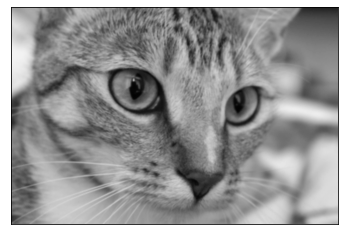

In [13]:
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

### Warning

Color image loaded by OpenCV is in **BGR** mode. But *Matplotlib* displays in **RGB** mode. So color images will no be displayed correctly in *Matplotlib* if image is read with OpenCV.

* There is a slight difference in pixel ordering in *OpenCV* and *Matplotlib*.

So when you display an image loaded in *OpenCV* using python, you may need to convert it into **RGB** mode. Below method demonstrate it:

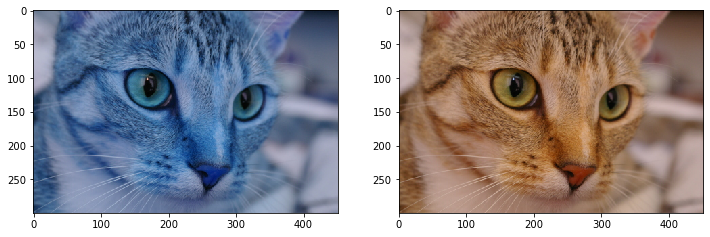

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cat_cv.tif')

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.

plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(img) # expects distored color
plt.subplot(122); plt.imshow(img2) # expects true color
plt.show()

#cv2.imshow('bgr imgae',img) #expects true color
#cv2.imshow('rgb image',img2) #expects disroted color
#cv2.waitKey(0)
#cv2.destroyAllWindows()